In [3]:
#basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import time
random_state=42
#preprocessing


#feature engineering
from sklearn.feature_selection import mutual_info_regression

#transformers and pipeline


#algorithms


#model evaluation


#stacking


#feature selection


**First look to data**

In [5]:
train = pd.read_csv('data/raw/train.csv', index_col=[0])
test = pd.read_csv('data/raw/test.csv', index_col=[0])
train.head(5)

RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
id                                                              
0      0.603610      -7.636942      0.023500         0.000005   
1      0.639451     -16.267598      0.071520         0.444929   
2      0.514538     -15.953575      0.110715         0.173699   
3      0.734463      -1.357000      0.052965         0.001651   
4      0.532968     -13.056437      0.023500         0.068687   

    InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
id                                                                             
0            0.000001                   0.051385   0.409866      290715.6450   
1            0.349414                   0.170522   0.651010      164519.5174   
2            0.453814                   0.029576   0.423865      174495.5667   
3            0.159717                   0.086366   0.278745      225567.4651   
4            0.000001                   0.331345   0.477769      213960.6789   

      Energy  BeatsPerMinute  
id                            
0   0.826267       147.53020  
1   0.145400       136.15963  
2   0.624667        55.31989  
3   0.487467       147.91212  
4   0.947333        89.58511

In [6]:
#reserved for pipieline
pipe_train = train.copy()
pipe_test = test.copy()

#for data analysis
train_df = train.copy()
test_df = test.copy()
train_df.head(5)

RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
id                                                              
0      0.603610      -7.636942      0.023500         0.000005   
1      0.639451     -16.267598      0.071520         0.444929   
2      0.514538     -15.953575      0.110715         0.173699   
3      0.734463      -1.357000      0.052965         0.001651   
4      0.532968     -13.056437      0.023500         0.068687   

    InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
id                                                                             
0            0.000001                   0.051385   0.409866      290715.6450   
1            0.349414                   0.170522   0.651010      164519.5174   
2            0.453814                   0.029576   0.423865      174495.5667   
3            0.159717                   0.086366   0.278745      225567.4651   
4            0.000001                   0.331345   0.477769      213960.6789   

      Energy  BeatsPerMinute  
id                            
0   0.826267       147.53020  
1   0.145400       136.15963  
2   0.624667        55.31989  
3   0.487467       147.91212  
4   0.947333        89.58511

**Explore data analysis**

In [7]:
train_df.describe().T

count           mean           std  \
RhythmScore                524164.0       0.632843      0.156899   
AudioLoudness              524164.0      -8.379014      4.616221   
VocalContent               524164.0       0.074443      0.049939   
AcousticQuality            524164.0       0.262913      0.223120   
InstrumentalScore          524164.0       0.117690      0.131845   
LivePerformanceLikelihood  524164.0       0.178398      0.118186   
MoodScore                  524164.0       0.555843      0.225480   
TrackDurationMs            524164.0  241903.692949  59326.601501   
Energy                     524164.0       0.500923      0.289952   
BeatsPerMinute             524164.0     119.034899     26.468077   

                                    min            25%            50%  \
RhythmScore                    0.076900       0.515850       0.634686   
AudioLoudness                -27.509725     -11.551933      -8.252499   
VocalContent                   0.023500       0.023500       0.066425   
AcousticQuality                0.000005       0.069413       0.242502   
InstrumentalScore              0.000001       0.000001       0.074247   
LivePerformanceLikelihood      0.024300       0.077637       0.166327   
MoodScore                      0.025600       0.403921       0.564817   
TrackDurationMs            63973.000000  207099.876625  243684.058150   
Energy                         0.000067       0.254933       0.511800   
BeatsPerMinute                46.718000     101.070410     118.747660   

                                     75%            max  
RhythmScore                     0.739179       0.975000  
AudioLoudness                  -4.912298      -1.357000  
VocalContent                    0.107343       0.256401  
AcousticQuality                 0.396957       0.995000  
InstrumentalScore               0.204065       0.869258  
LivePerformanceLikelihood       0.268946       0.599924  
MoodScore                       0.716633       0.978000  
TrackDurationMs            281851.658500  464723.228100  
Energy                          0.746000       1.000000  
BeatsPerMinute                136.686590     206.037000

**Grouping features for preprocessing purpose**

In [8]:
numerical_features = [feature for feature in train_df.columns if feature!='BeatsPerMinute']
target = "BeatsPerMinute"

Sampling data for eda

In [9]:
sampled_train = train_df.sample(frac = 0.01)

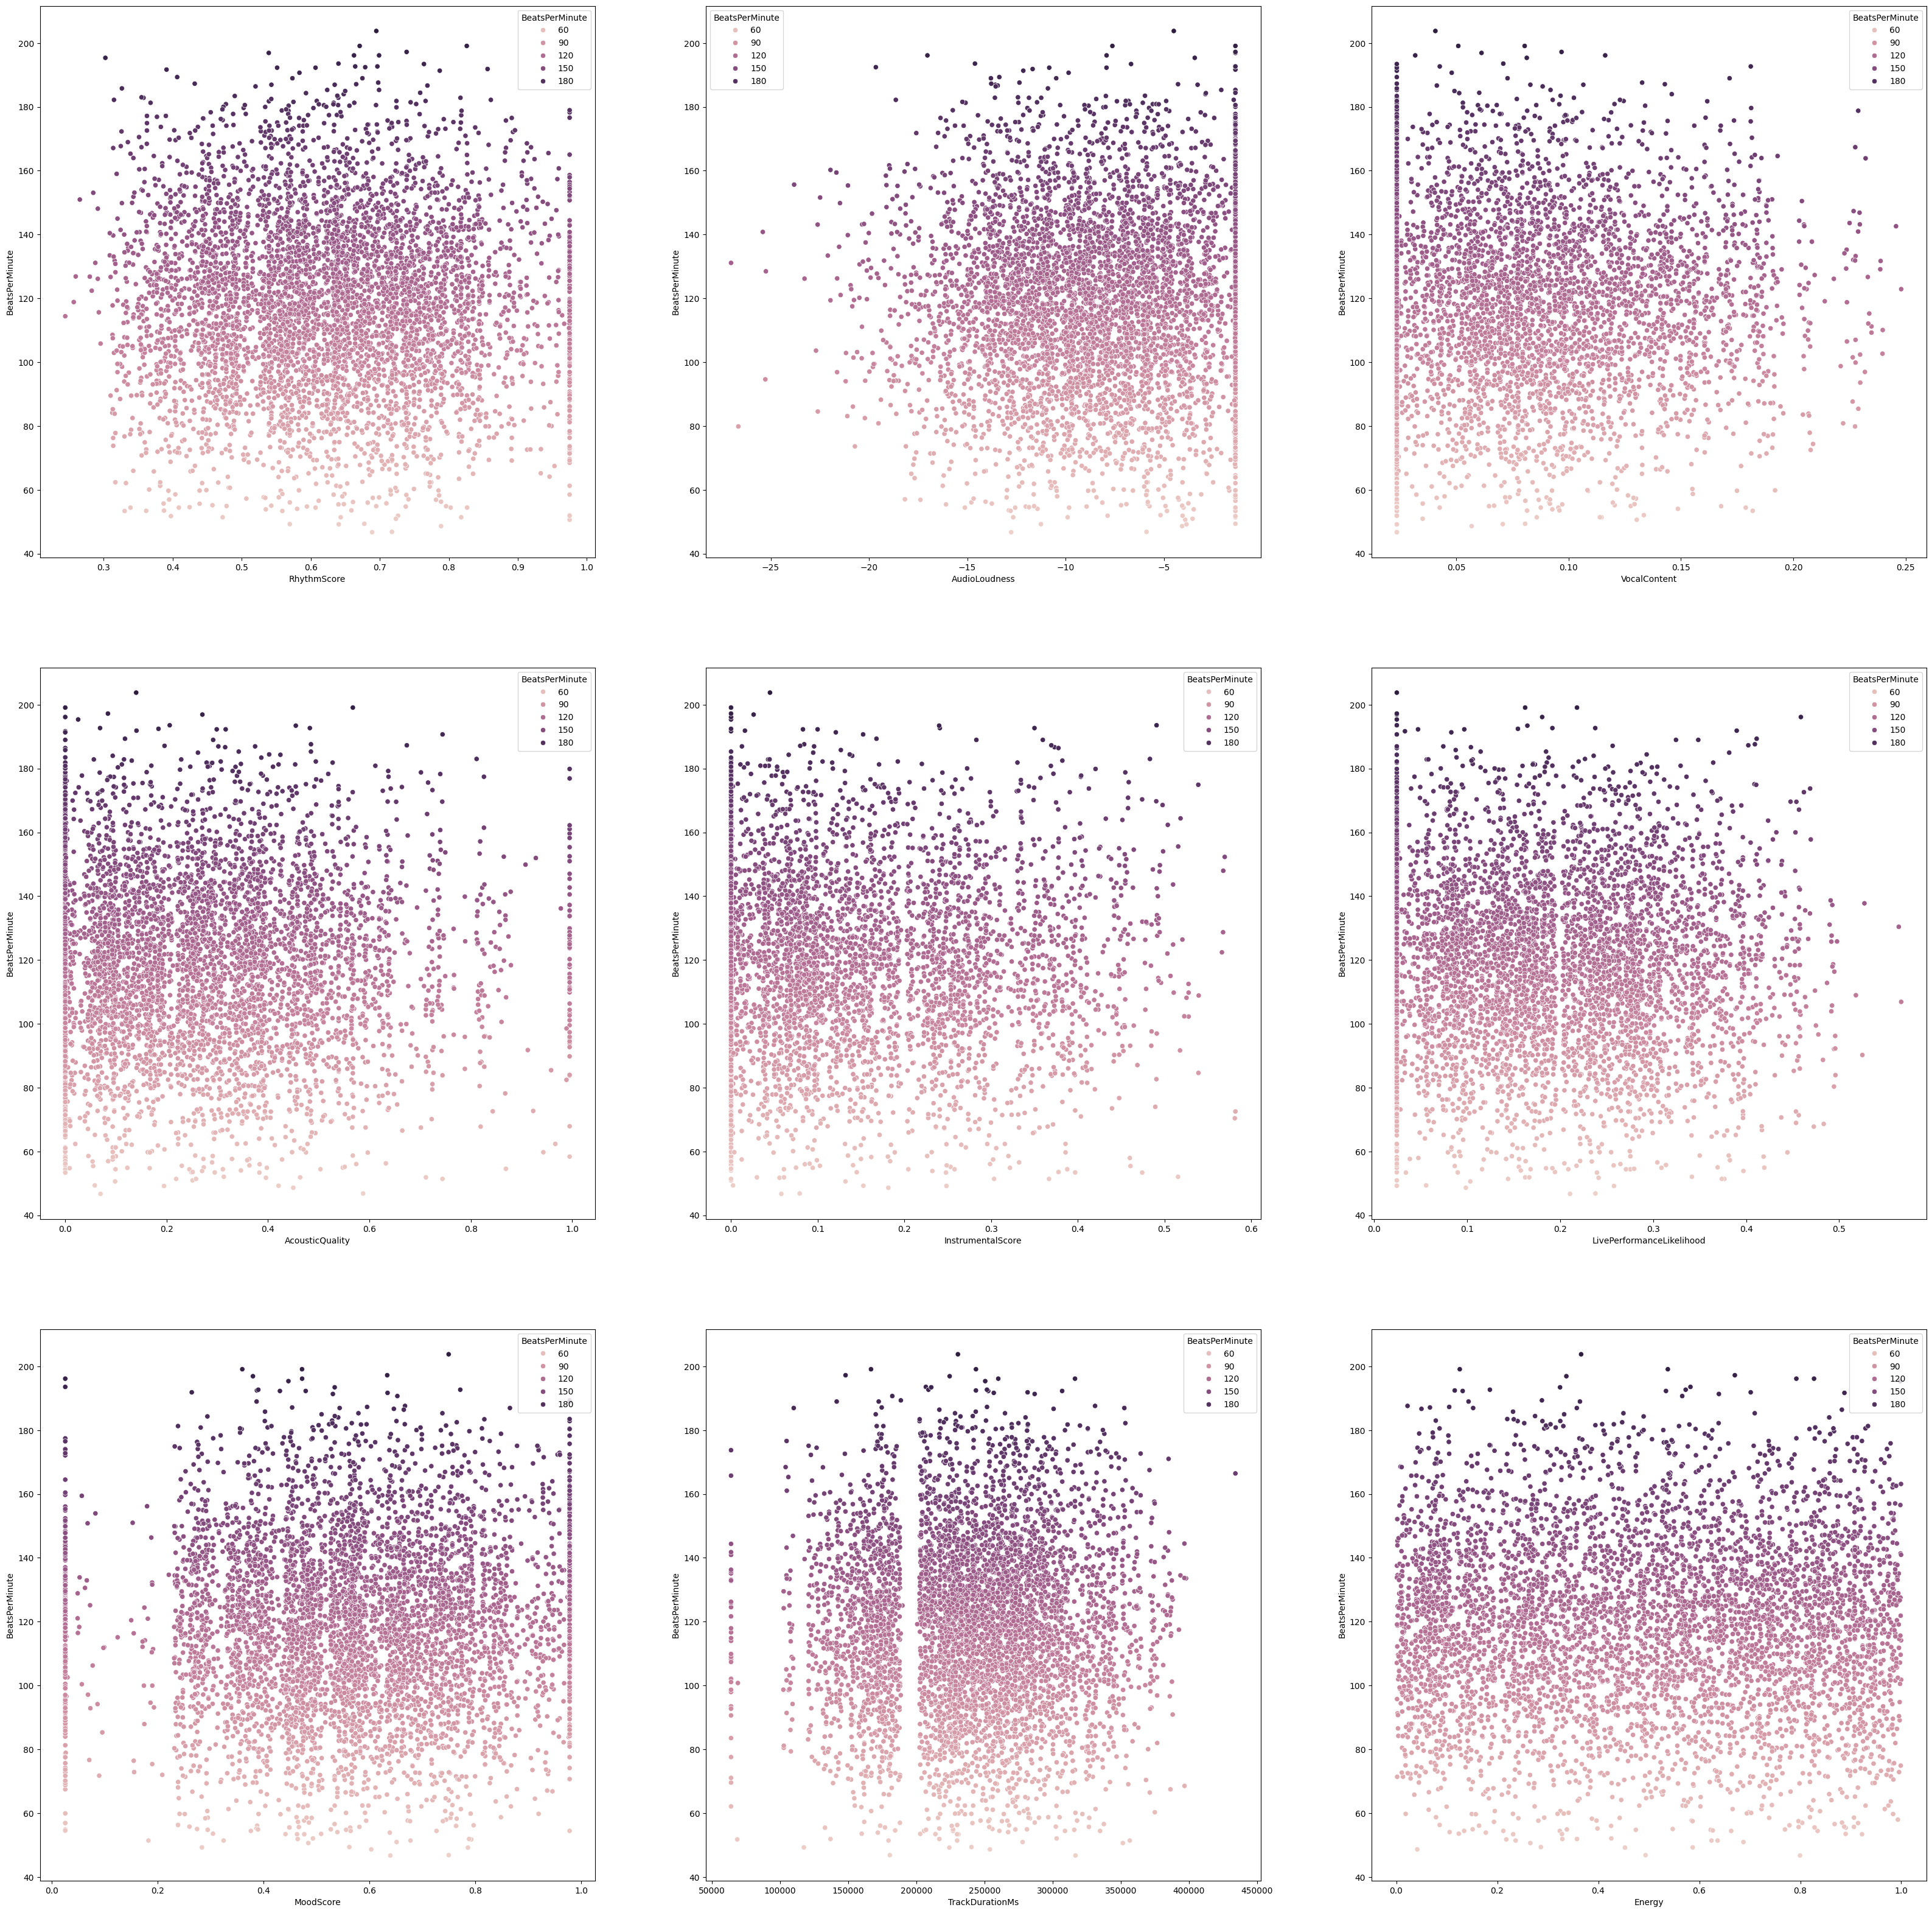

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(40, 40))
for var, subplot in zip(numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='BeatsPerMinute', data = sampled_train, ax=subplot, hue = 'BeatsPerMinute')

<Axes: >

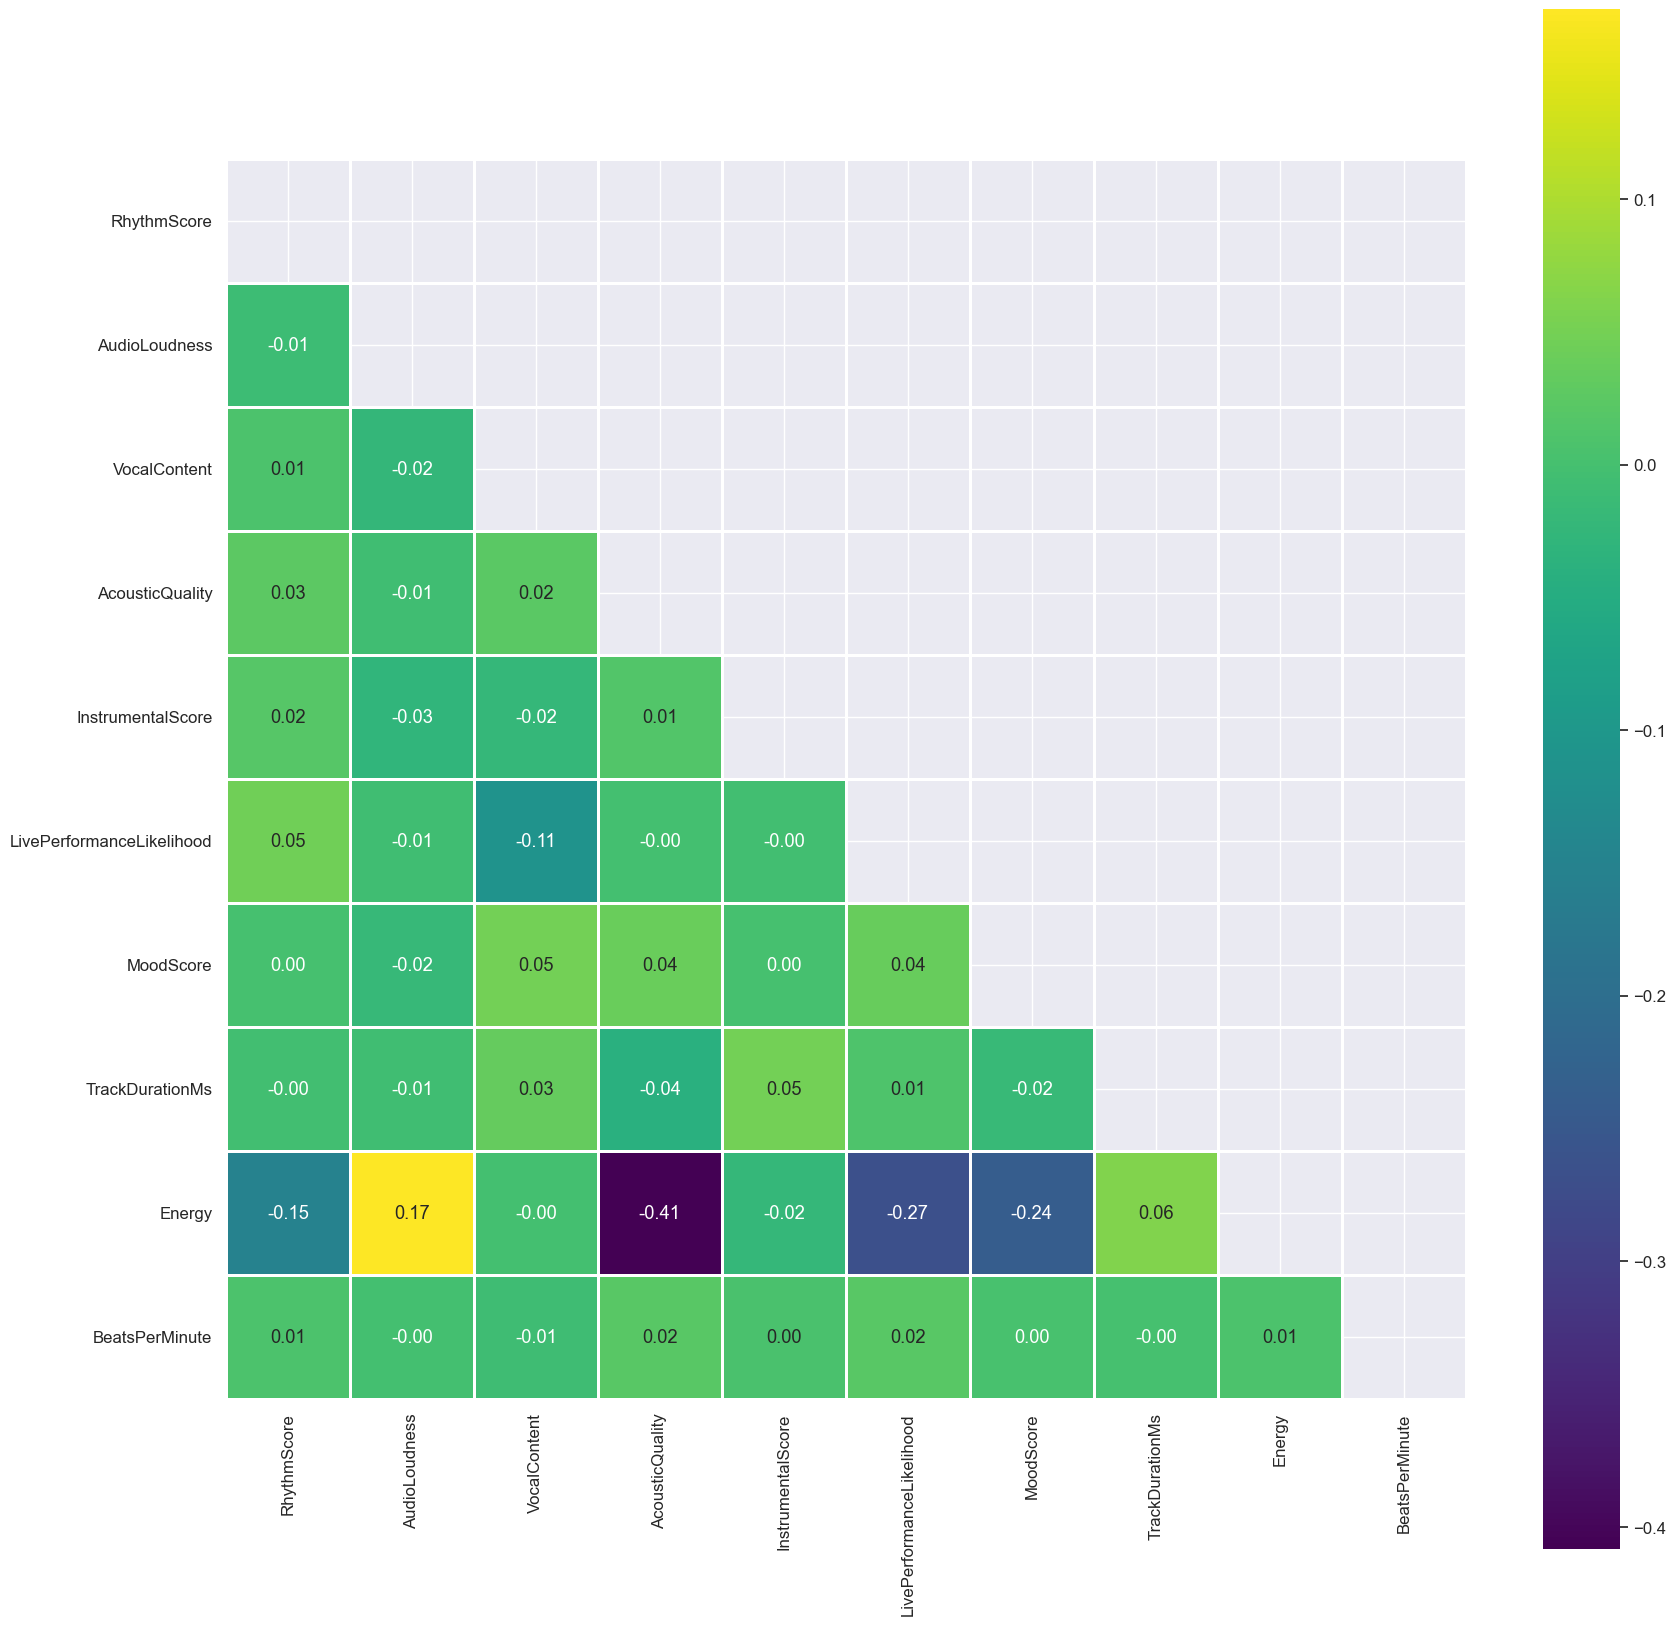

In [8]:
# Display correlations between numerical features and target on heatmap.
sns.set(font_scale=1.1)
corr_train = sampled_train.corr()
mask = np.triu(corr_train.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr_train, annot=True, fmt='.2f', cmap='viridis', square=True, mask=mask, linewidths=1)

In [9]:
# Mutual Information score
y_sampled = sampled_train.BeatsPerMinute
features_sampled = sampled_train[numerical_features]

mutual_info = mutual_info_regression(features_sampled, y_sampled, random_state=random_state)
mutual_info_s = pd.Series(mutual_info)
mutual_info_s.index = features_sampled.columns
mutual_info_s = pd.DataFrame(mutual_info_s.sort_values(ascending=False), columns = ['Num Feature'])
mutual_info_s.style.background_gradient("cool")

**Target distribution**

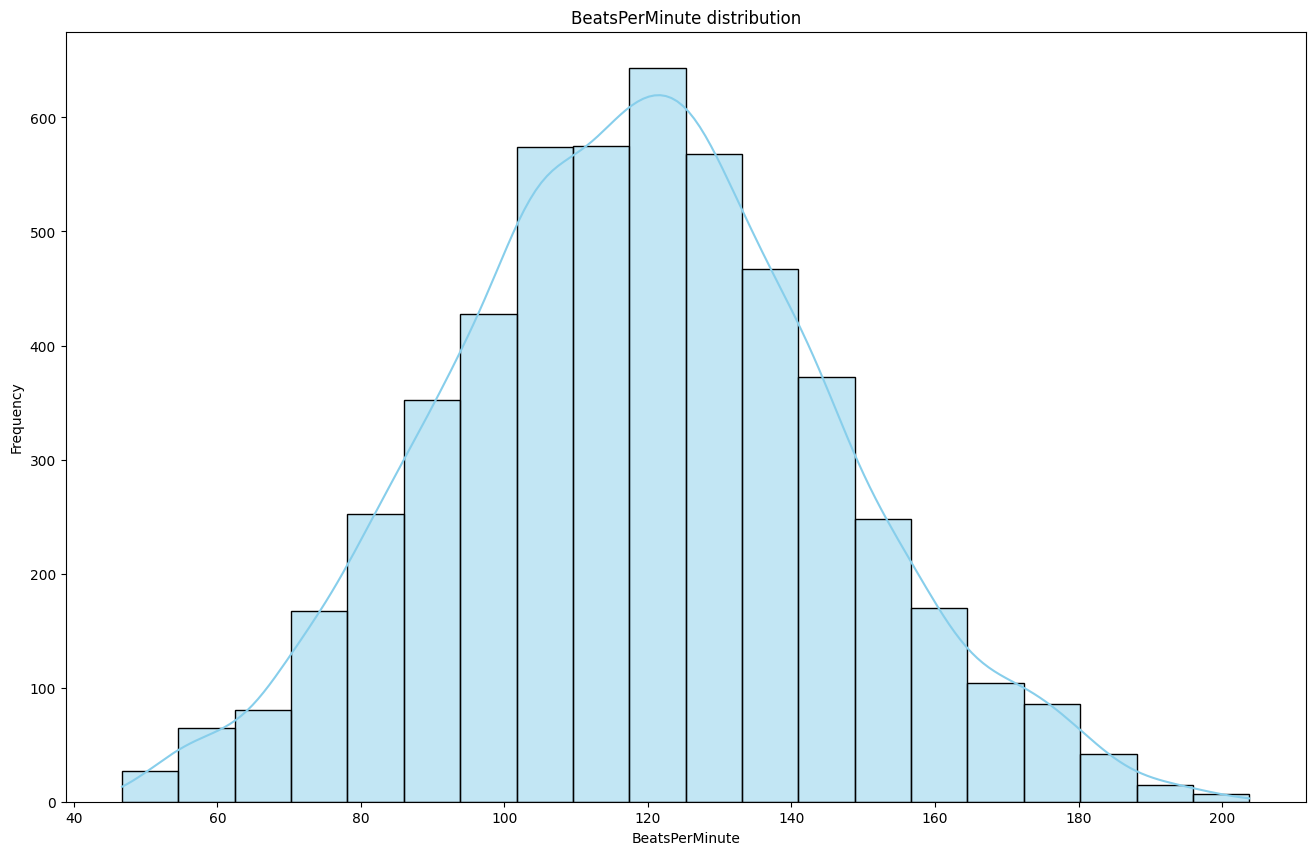

In [13]:
plt.figure(figsize=(16,10))
sns.histplot(x='BeatsPerMinute', data=sampled_train, bins=20, color='Skyblue', kde=True)
plt.title('BeatsPerMinute distribution')
plt.ylabel('Frequency')
plt.xlabel('BeatsPerMinute')
plt.show()

In [ ]:
**Feature engeneering**